# Reducción de dimensiones

## Importaciones

### Librerías

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pylab as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
import umap.umap_ as umap

In [4]:
from src.chaging_functions import *
from src.exploring_functions import *

### Datos

In [5]:
train = pd.read_csv('./data/train.csv')
train.drop(columns=["ID_code"], inplace=True)
test = pd.read_csv('./data/test.csv')
test.drop(columns=["ID_code"], inplace=True)
donwcast_df(train)
donwcast_df(test)

Memory usage of properties dataframe is : 306.7017822265625  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  152.77874755859375  MB
This is  49.81345281056605 % of the initial size
Memory usage of properties dataframe is : 305.1759033203125  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  152.5880126953125  MB
This is  50.000019999992 % of the initial size


## PCA

Ahora se va a probar a hacer la reducción de dimensiones con PCA

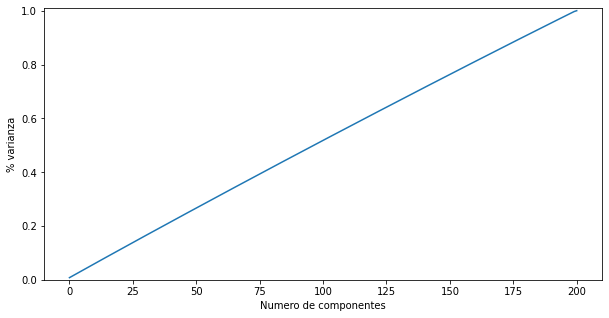

In [6]:
pca_visualize(train)

Se comprueba como con unas 160 dimensiones se puede explicar un 80% de la varianza, por lo que se van a reducir las dimensiones con PCA  a 160

In [7]:
target = train.target
train, test = pca_transform(train.drop(columns=['target']), test, 160)
train.insert(0, 'target', target)

In [8]:
train.to_csv('./data/train_pca.csv', index=False)
test.to_csv('./data/test_pca.csv', index=False)

Una vez se han reducido las dimensiones del dataframe con PCA, se van a reducir más con UMAP

## UMAP

### Datos modificados por PCA

In [9]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1.336534,0.718367,-0.713525,0.519055,-1.364123,1.609842,-0.529823,-0.628379,0.228820,0.739586,...,-1.160755,-0.279337,-0.030351,-0.397337,-0.493534,0.513501,-2.114641,0.082105,-2.007858,0.949458
1,1.111848,0.119058,0.536096,0.586210,-1.238861,-0.897298,0.033204,-1.281453,-0.719975,0.109991,...,-1.862113,-0.538497,1.132353,-2.661701,-0.713765,-0.195420,-0.072675,0.541145,-0.205841,-1.237966
2,0.113924,-0.757140,-0.331268,-1.463880,-1.684153,-0.396302,-0.237792,0.009711,-0.639153,1.753772,...,0.666251,-0.035848,0.638924,-1.251124,-0.496833,-0.250311,2.264617,-0.195169,0.224930,-0.641749
3,1.011866,-0.382341,0.990059,-0.362179,1.169714,-0.610955,-0.129394,-0.791030,-0.578090,-2.077329,...,-0.272386,1.065868,0.144445,0.454854,-0.019961,-2.204801,-1.268329,0.659430,-0.268599,0.510549
4,0.208670,-0.890397,-0.334707,0.774653,0.801756,0.076523,-0.245415,-0.356138,0.403656,0.030906,...,-0.165882,-0.499444,-0.273058,1.076743,0.122891,0.771253,-0.760152,1.004011,2.243276,-1.953300


In [10]:
train.head()

,target,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,0,-0.444409,0.131584,-0.377961,-1.129111,-0.599492,-0.634891,0.564721,-1.155759,-0.990338,...,-0.798106,-1.968160,1.406700,0.311439,-0.027220,-0.829675,2.317337,0.168822,-1.619806,-0.255555
1,0,2.210676,-0.295952,0.238851,0.714233,-0.036893,-1.080292,-0.594338,0.498631,1.546350,...,0.074981,1.277106,0.716239,-2.054784,-0.434757,-1.037782,-0.040305,-0.923748,-0.044323,-1.296534
2,0,-0.065659,-0.115391,-2.040533,-0.075524,-0.538937,-0.255048,-0.767106,0.039423,-1.225600,...,-0.711173,-0.899414,-0.111879,0.133638,0.176381,-0.301763,-1.672691,1.204852,-0.810744,-1.071010
3,0,1.368929,-0.158309,1.043792,-0.815960,-0.749660,-0.386559,-0.343573,0.684571,-1.147769,...,0.379653,-1.340014,0.324867,-0.162373,-1.614251,-1.763280,0.065290,-1.174678,0.253593,1.046381
4,0,0.552391,0.895766,0.798057,-0.547539,0.686026,0.444385,0.653605,0.945669,1.348569,...,-0.320129,1.105057,-0.113985,0.270499,0.878242,-0.818224,-0.389406,-1.355097,2.030187,-0.703275


#### Reducción a dos dimensiones sin target

In [11]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(train.drop(columns=['target']))

In [12]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.shape

(200000, 3)

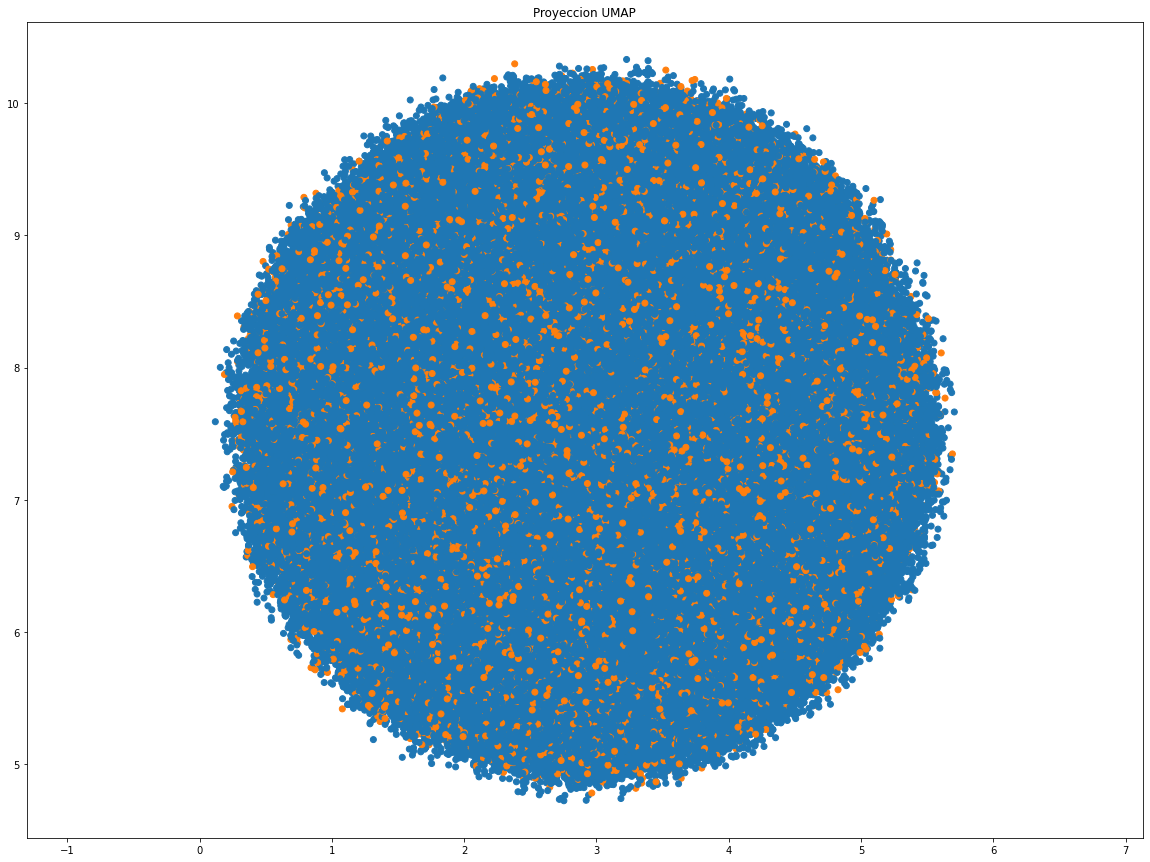

In [13]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Se ha clusterizado con umap el dataframe para reducirlo a 2 dimensiones y poder visualizarlo, pero se concluye que la clusterización no depende del taget, por lo que se va a dividir el dataframe de entrenamiento en dos partes para obligar a umap a clusterizar en función del target y comprobar si la clusterización permite o no predecir el target

#### Reducción a dos dimensiones con target

In [14]:
X = train.drop(columns=['target'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [15]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(X=X_train,y=y_train)

In [16]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [17]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,8.972944,-1.293220,0
1,9.767395,-1.975475,0
2,9.407090,-0.965116,0
3,6.431230,3.795661,1
4,9.963464,-1.585296,0


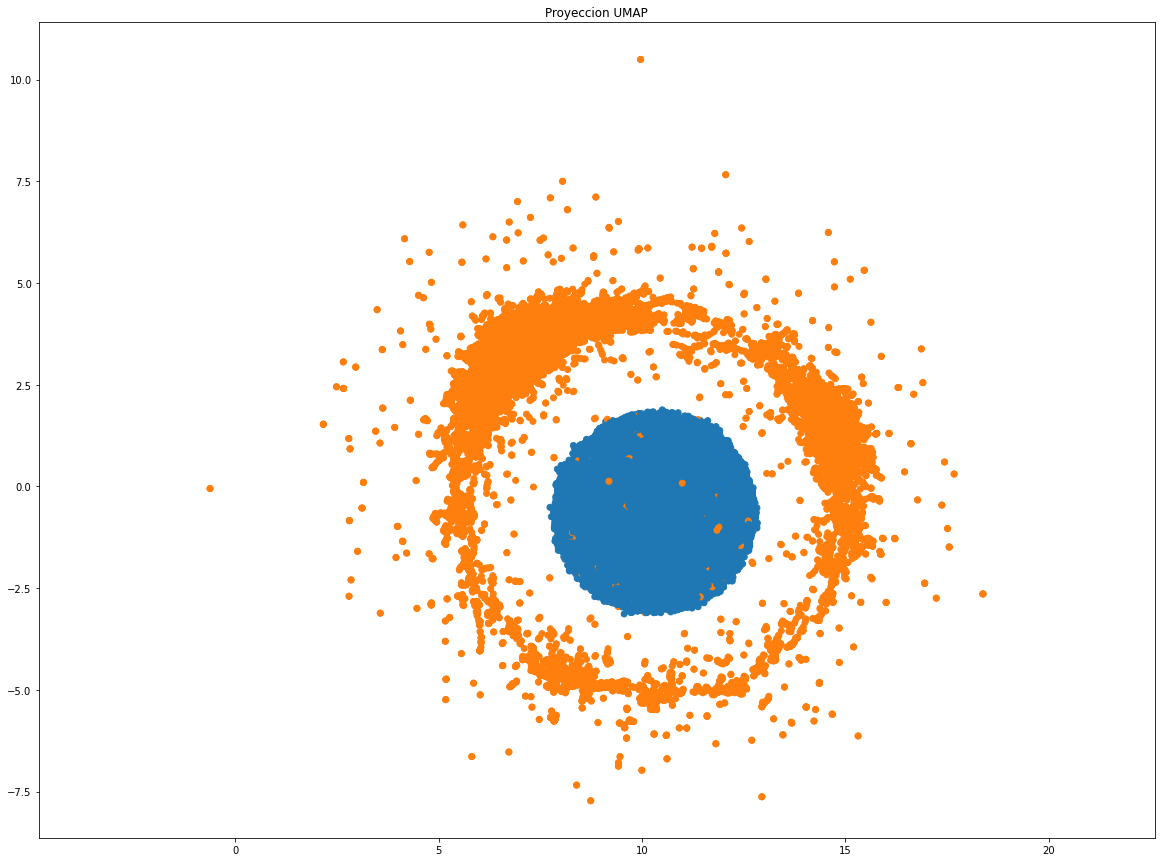

In [18]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [19]:
test_umap = umap.UMAP(n_components=2, metric='cosine').fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

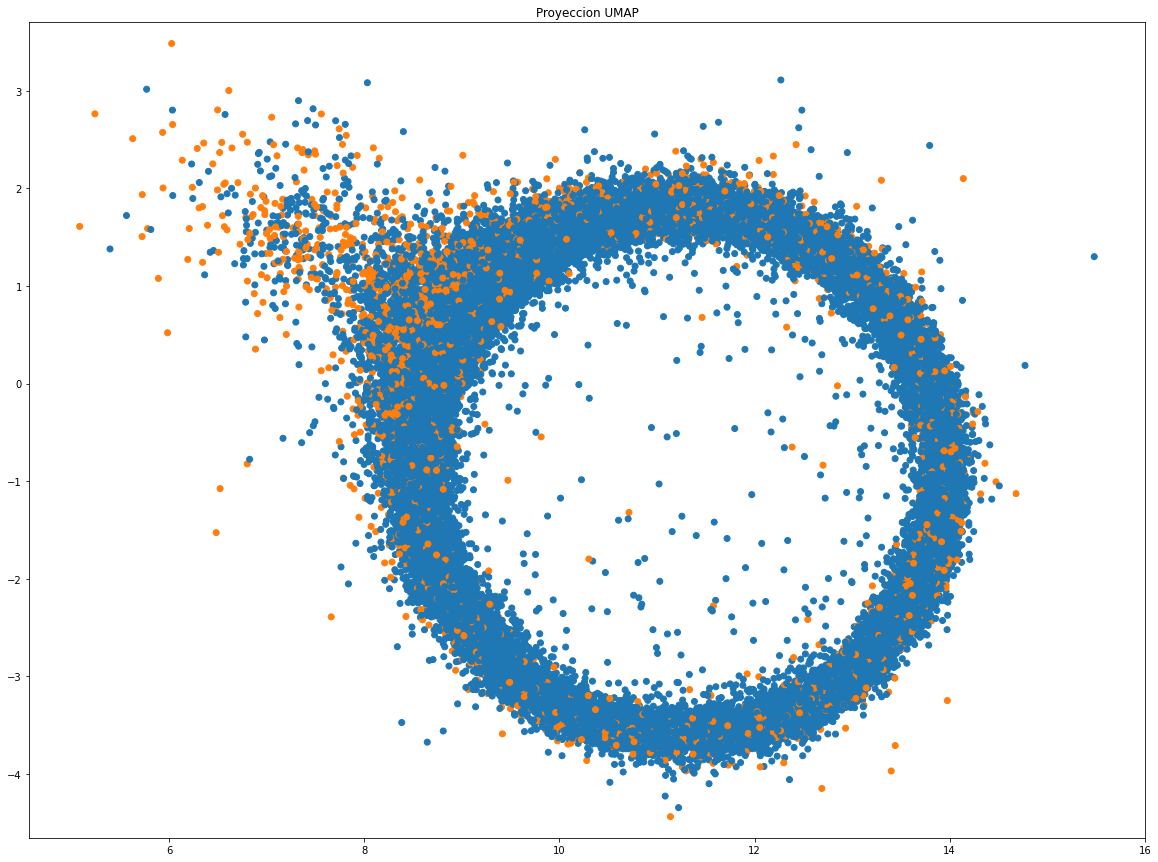

In [20]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buemas predicciones, se van a reducir las 160 dimensiones totales a 50 y se van a aplicar diferentes modelos para predecir los precios

#### Reducción a cincuenta dimensiones

In [21]:
train.head()

,target,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,0,-0.444409,0.131584,-0.377961,-1.129111,-0.599492,-0.634891,0.564721,-1.155759,-0.990338,...,-0.798106,-1.968160,1.406700,0.311439,-0.027220,-0.829675,2.317337,0.168822,-1.619806,-0.255555
1,0,2.210676,-0.295952,0.238851,0.714233,-0.036893,-1.080292,-0.594338,0.498631,1.546350,...,0.074981,1.277106,0.716239,-2.054784,-0.434757,-1.037782,-0.040305,-0.923748,-0.044323,-1.296534
2,0,-0.065659,-0.115391,-2.040533,-0.075524,-0.538937,-0.255048,-0.767106,0.039423,-1.225600,...,-0.711173,-0.899414,-0.111879,0.133638,0.176381,-0.301763,-1.672691,1.204852,-0.810744,-1.071010
3,0,1.368929,-0.158309,1.043792,-0.815960,-0.749660,-0.386559,-0.343573,0.684571,-1.147769,...,0.379653,-1.340014,0.324867,-0.162373,-1.614251,-1.763280,0.065290,-1.174678,0.253593,1.046381
4,0,0.552391,0.895766,0.798057,-0.547539,0.686026,0.444385,0.653605,0.945669,1.348569,...,-0.320129,1.105057,-0.113985,0.270499,0.878242,-0.818224,-0.389406,-1.355097,2.030187,-0.703275


In [22]:
train_umap = umap.UMAP(n_components=50, metric='cosine').fit_transform(train.drop(columns=['target']))

In [23]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.to_csv('./data/train_umap.csv', index=False)

In [24]:
train_umap.head()

,target,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,1.113621,6.733791,4.589894,6.310328,4.865850,5.693409,6.977394,5.271438,3.845706,...,5.055932,3.773117,4.405006,5.189785,6.914415,3.917247,4.504989,5.019043,4.543184,4.915314
1,0,1.315057,6.585617,4.354332,5.991034,4.754446,5.819276,6.871869,5.123793,3.837755,...,5.127789,3.483985,4.189178,5.202298,6.761857,4.473963,4.597647,5.132659,4.641823,5.225281
2,0,1.392158,6.642851,4.363418,6.429753,4.777481,5.905176,6.765197,5.026983,4.012644,...,5.500231,3.958331,4.576559,5.235821,7.016376,3.812544,4.610091,5.018393,4.246831,5.434997
3,0,1.300546,6.700571,4.538785,6.364836,4.724197,5.739353,6.552221,4.995946,4.049114,...,5.113375,3.692586,4.338538,5.340883,6.260408,3.946577,4.509180,5.202645,4.670272,5.540152
4,0,1.567212,6.620705,4.527534,6.196063,4.961917,5.878582,6.818794,4.498536,4.061768,...,4.946283,3.654289,4.427623,5.134390,6.619771,3.925439,4.648223,5.162557,4.430078,5.332372


In [25]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1.336534,0.718367,-0.713525,0.519055,-1.364123,1.609842,-0.529823,-0.628379,0.228820,0.739586,...,-1.160755,-0.279337,-0.030351,-0.397337,-0.493534,0.513501,-2.114641,0.082105,-2.007858,0.949458
1,1.111848,0.119058,0.536096,0.586210,-1.238861,-0.897298,0.033204,-1.281453,-0.719975,0.109991,...,-1.862113,-0.538497,1.132353,-2.661701,-0.713765,-0.195420,-0.072675,0.541145,-0.205841,-1.237966
2,0.113924,-0.757140,-0.331268,-1.463880,-1.684153,-0.396302,-0.237792,0.009711,-0.639153,1.753772,...,0.666251,-0.035848,0.638924,-1.251124,-0.496833,-0.250311,2.264617,-0.195169,0.224930,-0.641749
3,1.011866,-0.382341,0.990059,-0.362179,1.169714,-0.610955,-0.129394,-0.791030,-0.578090,-2.077329,...,-0.272386,1.065868,0.144445,0.454854,-0.019961,-2.204801,-1.268329,0.659430,-0.268599,0.510549
4,0.208670,-0.890397,-0.334707,0.774653,0.801756,0.076523,-0.245415,-0.356138,0.403656,0.030906,...,-0.165882,-0.499444,-0.273058,1.076743,0.122891,0.771253,-0.760152,1.004011,2.243276,-1.953300


In [26]:
test_umap = umap.UMAP(n_components=50, metric='cosine').fit(X=train.drop(columns=['target'])).transform(X=test)

In [27]:
test_umap = pd.DataFrame(test_umap)

In [28]:
test_umap.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,7.168499,4.994757,5.732593,6.451355,3.938752,5.151474,6.396329,3.346524,3.699590,4.655514,...,4.062393,7.247398,6.502106,5.619701,4.113154,4.201916,4.999532,5.022849,4.902059,4.540885
1,6.732160,4.836756,5.535598,6.363123,3.616630,5.335241,6.239214,3.639220,3.475446,4.933012,...,4.067223,6.943063,6.324608,5.084781,4.449618,4.082663,4.743608,4.959577,4.348150,4.969189
2,6.987339,5.072847,5.935274,6.767470,3.523033,5.512698,5.990826,3.442755,3.818174,4.635787,...,4.416115,6.819400,5.989507,4.775315,4.375879,4.675863,4.759737,4.769132,4.608280,4.354496
3,6.904862,5.070655,5.829754,6.400220,3.728005,5.361973,6.107656,3.572851,3.860723,4.772371,...,4.201963,6.363760,6.473986,5.437976,3.675771,4.532006,4.813612,5.407368,4.792859,4.051619
4,7.118305,5.000357,5.842494,6.361331,3.497085,5.196684,6.800430,2.992772,3.696077,4.681131,...,4.091700,6.770476,6.012134,5.304680,4.000038,4.628509,5.137963,4.703279,4.715405,4.411774


In [29]:
test_umap.to_csv('./data/test_umap.csv', index = False)

### Datos sin modificar por PCA

In [6]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


#### Reducción a dos dimensiones con target

In [7]:
X = train.drop(columns=['target', 'ID_code'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [8]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(X=X_train,y=y_train)

In [9]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [10]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,0.625865,-1.471272,0
1,-0.372379,0.755483,0
2,-1.258414,-0.901323,0
3,4.045939,1.736810,1
4,0.710227,0.358228,0


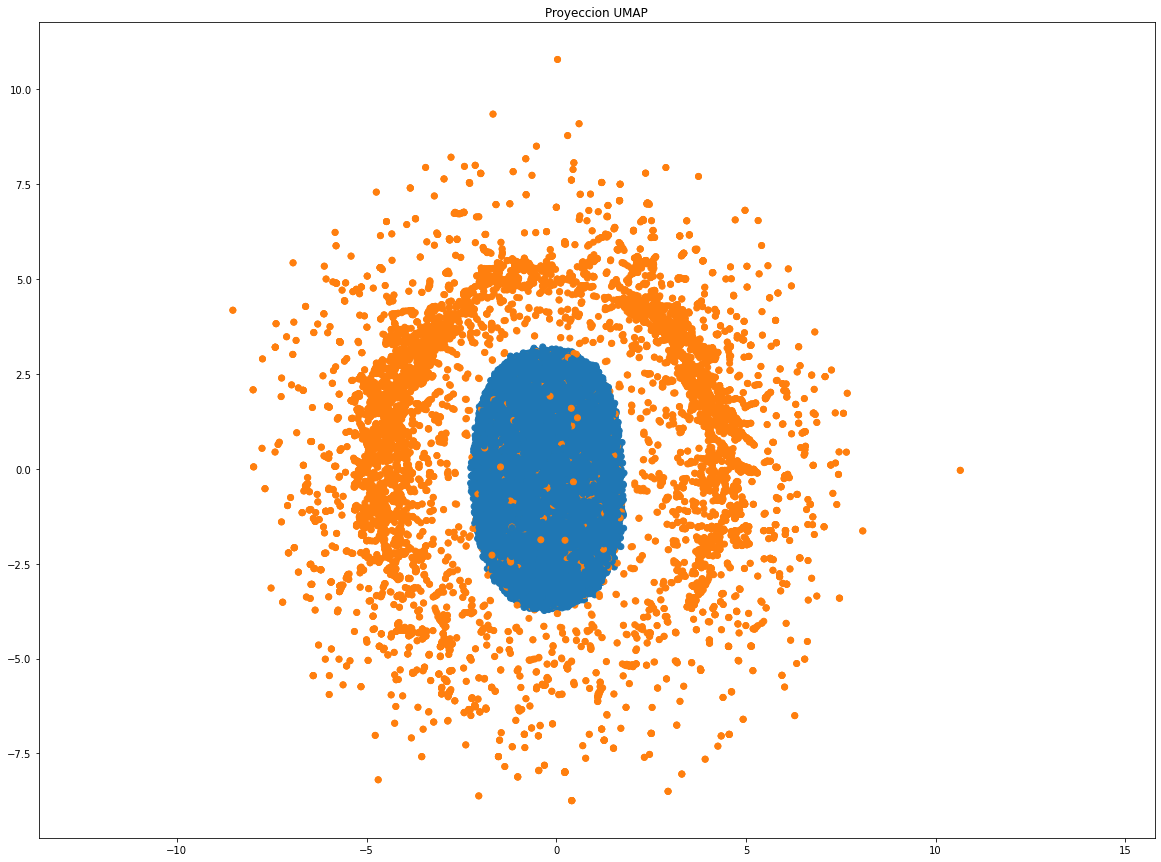

In [11]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [12]:
test_umap = umap.UMAP(n_components=2, metric='cosine').fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

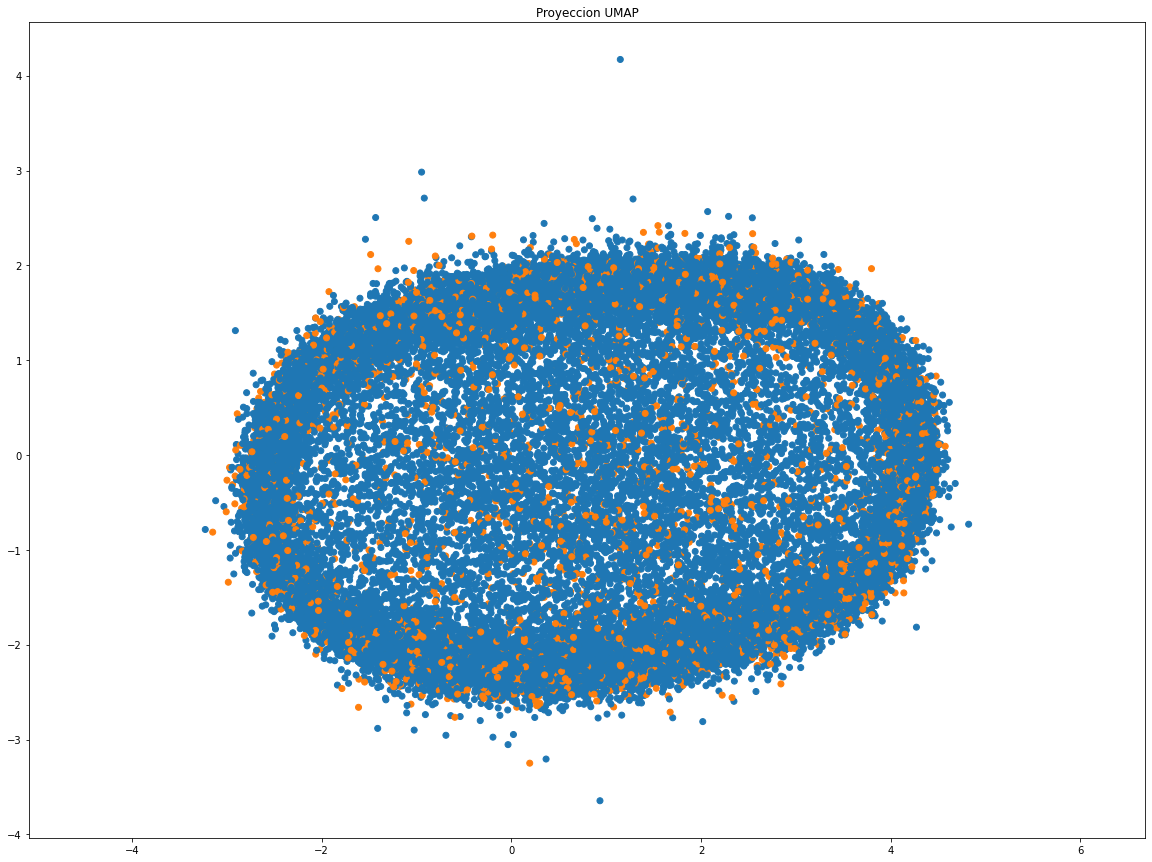

In [13]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buenas predicciones